In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

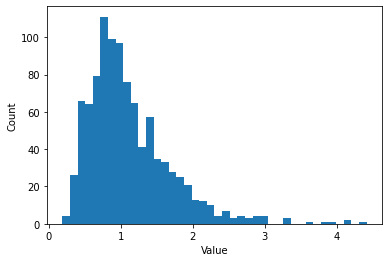

In [2]:
## create some data

# number of data points
n = 1000

# number of histogram bins
k = 40

# generate log-normal distribution
data = np.exp( np.random.randn(n)/2 )


# one way to show a histogram
plt.hist(data,k)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

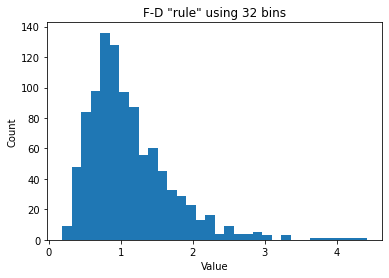

In [3]:
## try the Freedman-Diaconis rule

r = 2*stats.iqr(data)*n**(-1/3)
b = np.ceil( (max(data)-min(data) )/r )

plt.hist(data,int(b))

# or directly from the hist function
#plt.hist(data,bins='fd')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('F-D "rule" using %g bins'%b)
plt.show()

/home/yu/.pyenv/versions/3.7.10/envs/ml_env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

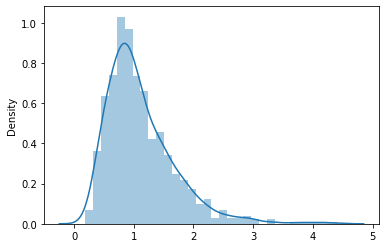

In [4]:
# small aside on Seaborn

import seaborn as sns
sns.distplot(data) # uses FD rule by default

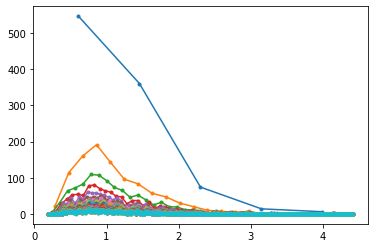

In [5]:
## lots of histograms with increasing bins

bins2try = np.round( np.linspace(5,n/2,30) )

for bini in range(len(bins2try)):
    y,x = np.histogram(data,int(bins2try[bini]))
    x = (x[:-1]+x[1:])/2
    plt.plot(x,y,'.-')